# FONTE DOS DADOS DO SATÉLITE GOES-16:

----------------------------------------------------

* **`[canal do visível (TVIS, 0,64 μm, 500 m)]`** - canal 2: http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/
* Exemplo: S10635334_202108010810.nc

----------------------------------------------------

* **`[canal do vapor d’água (TW, 6,15 μm, 2 km)]`** - canal 8: http://ftp.cptec.inpe.br/goes/goes16/retangular/ch08/
*    Exemplo: S10635340_202006291440.nc

----------------------------------------------------

* **`[canal do infravermelho (TIR, 10,3 μm, 2 km)]`** - canal 13: http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/  
* Exemplo: S10635346_202007010000.nc

----------------------------------------------------

# **1° Passo:** Importando as bibliotecas

In [1]:
import proplot as pplt
import xarray as xr
import numpy as np
from matplotlib.colors import LinearSegmentedColormap 
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import os
import glob
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import time
from matplotlib import cm                          
import salem
from cpt_convert import loadCPT

import warnings
warnings.filterwarnings("ignore")

# **2° Passo:** Declarando funções

In [2]:
#-----------------------------------------------------------------------------------
# Função que plota os Estados
#-----------------------------------------------------------------------------------
def evm_plot_states(shapefile, cor, espessura_linha):

    """
    Retorna a plotagem dos contornos de um shapefile na figura

    Parâmetros de entrada:
                shapefile (shp): shapefile da regiao

    Parâmetros de saída:
                figura com o contorno da região baseado no shapefile fornecido
    """
    import cartopy.crs as ccrs
    import cartopy.io.shapereader as shpreader
    import matplotlib.pyplot as plt

    shapefile = list(shpreader.Reader(shapefile).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor=cor,facecolor='none', linewidth=espessura_linha)

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label, linestyle):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                aneis (lista): tamanho do raio do círculo em km
                lon_r (float): valor da longitude do centro do círculo em graus
                lat_r (float): valor da latitude do centro do círculo em graus
                color (str): cor do raio do círculo
                label (str): legenda

    Parâmetros de saída:
                latitude e longitude que delimita círculos de distância centrado no radar e plota os círculos
    """

    import geopy
    from geopy import distance

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, linestyle=linestyle)

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral_painel(aneis, lon_r, lat_r, color, label, linestyle, axx, lww):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                aneis (lista): tamanho do raio do círculo em km
                lon_r (float): valor da longitude do centro do círculo em graus
                lat_r (float): valor da latitude do centro do círculo em graus
                color (str): cor do raio do círculo
                label (str): legenda

    Parâmetros de saída:
                latitude e longitude que delimita círculos de distância centrado no radar e plota os círculos
    """

    import geopy
    from geopy import distance

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax[axx].plot(lons[i,:], lats[i,:], color=color, label= label, linestyle=linestyle, lw=lww)


# **Plota figura**

CPU times: total: 1min 18s
Wall time: 1min 20s


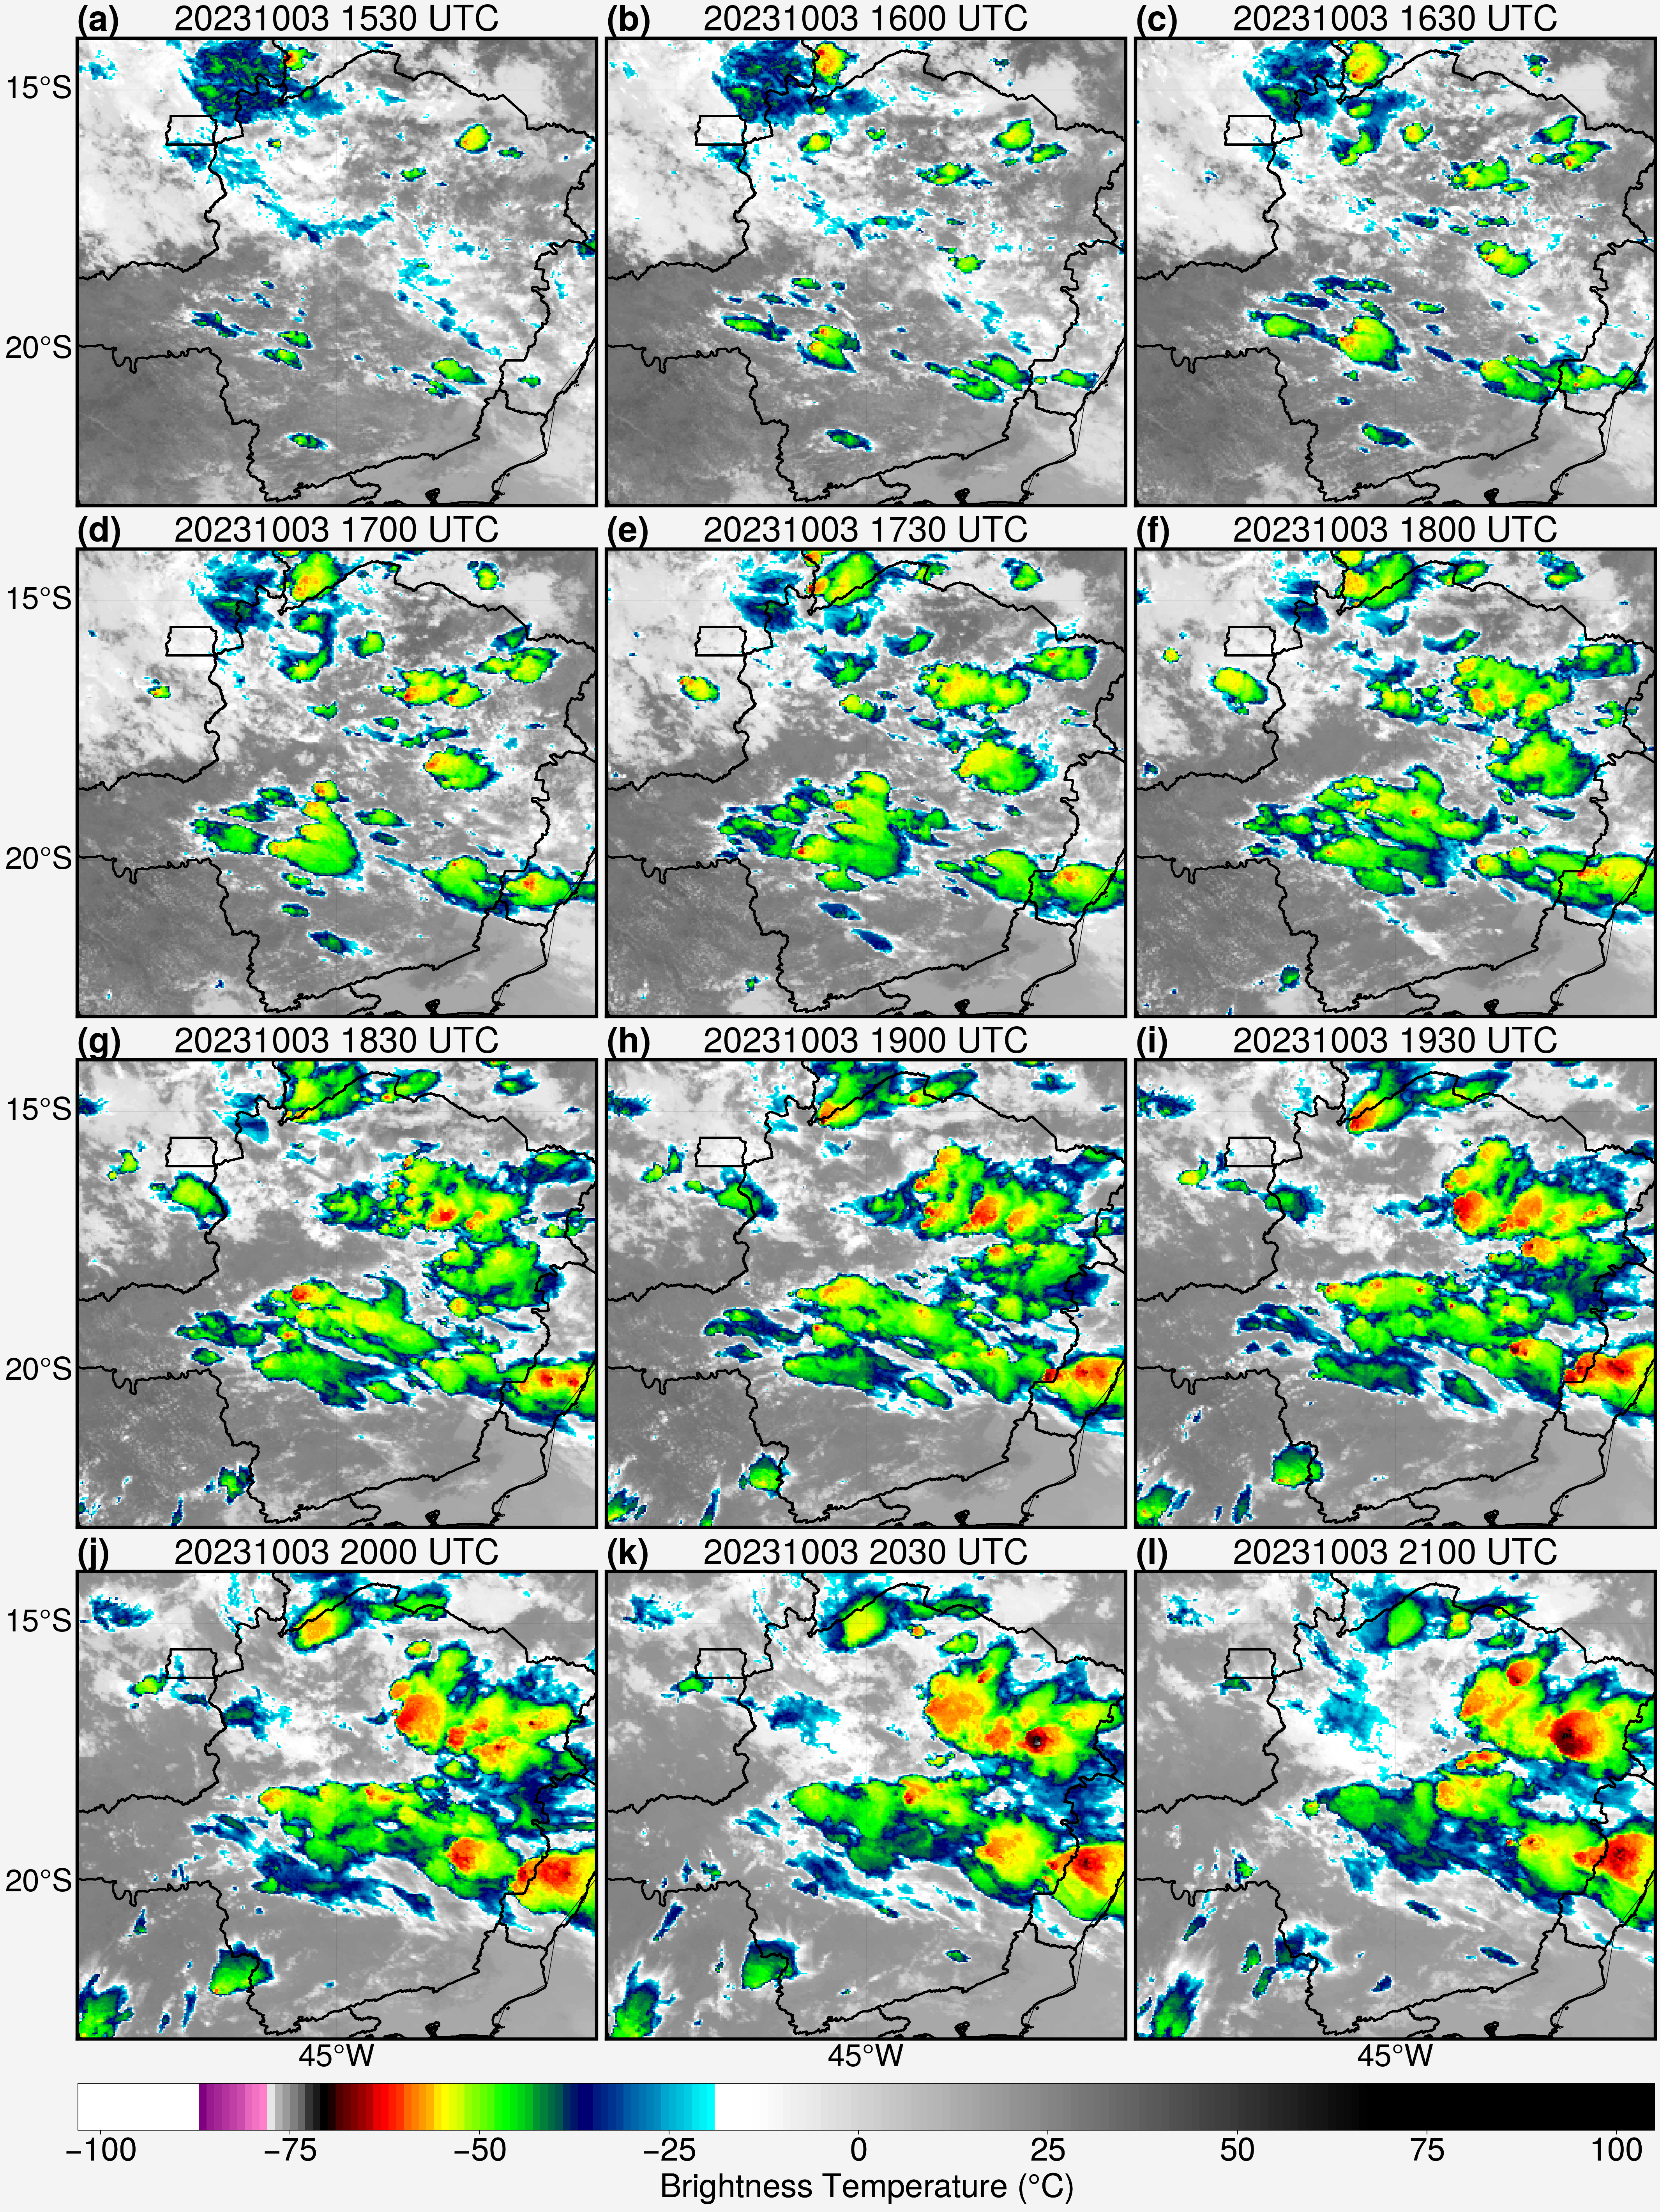

In [19]:
%%time
#==================================================================================================#
#                              DEFINIÇÃO DE PARÂMETROS
#==================================================================================================#
# corees do IR
cpt_ir = loadCPT('ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = -23, -14, -50, -40

# lista das imagens
files = [
         'S10635346_202310031530.nc',
         'S10635346_202310031600.nc',
         'S10635346_202310031630.nc',
         'S10635346_202310031700.nc',
         'S10635346_202310031730.nc',
         'S10635346_202310031800.nc',
         'S10635346_202310031830.nc',
         'S10635346_202310031900.nc',
         'S10635346_202310031930.nc',
         'S10635346_202310032000.nc',
         'S10635346_202310032030.nc',
         'S10635346_202310032100.nc',
        ]

#==================================================================================================#
#                              DEFINIÇÕES DO GRÁFICO
#==================================================================================================#
# cria moldura da figura
fig, ax = pplt.subplots(ncols=3, nrows=4, axheight=6, tight=True, proj='pcarree')

# formata os eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=5, lonlines=5,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          abc=True, abcstyle='(a)', abcsize=5,
          small='40px', large='45px') #suptitle='GOES-16 CH13 (10.35 µm)')

#==================================================================================================#
#                                     LOOP DAS IMAGENS
#==================================================================================================#
for i, file in enumerate(files):

    #--------------------------------------------------------#
    #                    Leitura ABI
    #--------------------------------------------------------#
    # nome do arquivo
    basename = os.path.basename(os.path.splitext(file)[0]) # S10635346_202405011500.nc

    # extrai a data da imagem
    ano, mes, dia, hor, min = basename[10:14], basename[14:16], basename[16:18], basename[18:20], basename[20:22]

    # leitura do arquivo Netcdf
    imagem = xr.open_dataset(f'input/{file}').sel(lon=slice(lonmin, lonmax), lat=slice(latmin, latmax))

    # extrai os dados
    data, lat, lon = (imagem['Band1']/100)-273.15, imagem['lat'], imagem['lon']

    # é necessário inverter o eixo y
    data = np.flipud(data)

    #--------------------------------------------------------#
    #                   Plota imagem
    #--------------------------------------------------------#
    if i == 0:
        map1 = ax[i].imshow(data,
                            cmap=cmap_ir, vmin=-103.0, vmax=105,
                            extent=[lonmin, lonmax, latmin, latmax],
                            levels=pplt.arange(-103.0, 105, 1.0))
    else:
        ax[i].imshow(data,
                     cmap=cmap_ir, vmin=-103.0, vmax=105,
                     extent=[lonmin, lonmax, latmin, latmax],
                     levels=pplt.arange(-103.0, 105, 1.0))
        
    # plota titulo de cada figura
    if (i==1 or i==2 or i==4 or i==5 or i==7 or i==8): ax[i].format(title=f'{ano}{mes}{dia} {hor}{min} UTC', labels=False, linewidth=3)
    if (i==10 or i==11): ax[i].format(title=f'{ano}{mes}{dia} {hor}{min} UTC', labels=[False, False, True, False], linewidth=3)
    if (i==0 or i==3 or i==6): ax[i].format(title=f'{ano}{mes}{dia} {hor}{min} UTC', labels=[True, False, False, False], linewidth=3)
    if (i==9): ax[i].format(title=f'{ano}{mes}{dia} {hor}{min} UTC', labels=[True, False, True, False], linewidth=3)

    # plota contornos
    evm_plot_states('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp', 'black', 1.8)
    evm_plot_states('https://github.com/evmpython/shapefile/raw/main/UFs/MG/MG_UF_2019.shp', 'black', 1.8)
    evm_plot_states('https://github.com/evmpython/shapefile/raw/main/UFs/RJ/RJ_UF_2019.shp', 'black', 1.8)
    evm_plot_states('https://github.com/evmpython/shapefile/raw/main/UFs/ES/ES_UF_2019.shp', 'black', 1.8)
    evm_plot_states('https://github.com/evmpython/shapefile/raw/main/UFs/BA/BA_UF_2019.shp', 'black', 1.8)
    evm_plot_states('https://github.com/evmpython/shapefile/raw/main/UFs/GO/GO_UF_2019.shp', 'black', 1.8)

#==================================================================================================#
#                                   BARRA DE CORES E SALVA FIGURA
#==================================================================================================#
# plota barra de cores
fig.colorbar(map1, loc='b', label='Brightness Temperature ($\degree$C)', ticks=25, ticklabelsize=30, labelsize=30, width=0.6, length=0.999)

# salva figura
fig.save('GOES16_ch13_composicao.jpg', dpi=300)